In [68]:
import pandas as pd
import numpy as np


In [69]:
data_ori=pd.read_csv('/Users/mar/data/Proyecto-Shark-Mar-S-nchez-de-Salas/Dataset_proyecto_Sharks/datashark.csv', sep=',', encoding='latin-1')

In [70]:
data= data_ori.copy()  #Para trabajar con una copia y poder comparar si fuera necesario
data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'''
Lo que puedo hacer es:
    -drop duplicates pero sin pasarse.
    -poner bien todas las columnas.Sustituir espacio por _
    -poner year como int en vez de como float
    -mirar los valores unicos de cada columna y ver si tengo que unificar los valores que sean igual
    -en Species, unificar valores y cambiar nan por "unknown"
    -analisis de nulos y sustutuir por cositas
    -EDA. Ver estadisticas de todo, varianza, correlación. No se pueden borrar columnas.
    -sacar el resultado que sería:
      -especie y numero de ataques, 
      -si es más a mujeres o a hombres
      -por la Activity (si alguna actividad tiene más ataques que otra)"""
      ver si hay dos iguales, con el dato de una se puede llenar la otra date case and year o algo asi 
      for iten in columna 1
        if item es dif al item de la col 1 (con su axis) 
        la hora, % fatales
        
''' pues el item de la dos=al de la uno inplace y ya
https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/


In [71]:
data.info() #uy, hay muchos nulos. Y son casi todo objetos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [72]:
data.shape #no se puede borrar columnas y como mínimo tiene que quedarse con 1500 filas

(25723, 24)

# Arreglar los nombres de columnas. Quitar espacios

In [73]:
columnas=list(data.columns)
columnas_bien= [nombre.replace(' ','') for nombre in columnas]
columnas_bien

['CaseNumber',
 'Date',
 'Year',
 'Type',
 'Country',
 'Area',
 'Location',
 'Activity',
 'Name',
 'Sex',
 'Age',
 'Injury',
 'Fatal(Y/N)',
 'Time',
 'Species',
 'InvestigatororSource',
 'pdf',
 'hrefformula',
 'href',
 'CaseNumber.1',
 'CaseNumber.2',
 'originalorder',
 'Unnamed:22',
 'Unnamed:23']

In [74]:
data.columns=columnas_bien #Ya tiene las columnas bien escritas

# Borrar duplicados

In [93]:
data.duplicated()
data.drop_duplicates(inplace=True)

In [77]:
data.shape, data_ori.shape

((6312, 24), (25723, 24))

In [78]:
data.duplicated().any() #ya no hay duplicados. qué bien. 

False

# Mirar nulos

In [79]:
nan_cols= data.isna().sum()
nan_cols[nan_cols>0]

CaseNumber                 2
Date                      10
Year                      12
Type                      14
Country                   60
Area                     465
Location                 550
Activity                 554
Name                     220
Sex                      575
Age                     2841
Injury                    38
Fatal(Y/N)               549
Time                    3364
Species                 2848
InvestigatororSource      27
pdf                       10
hrefformula               11
href                      10
CaseNumber.1              10
CaseNumber.2              10
originalorder              3
Unnamed:22              6311
Unnamed:23              6310
dtype: int64

In [80]:
diccna=dict(nan_cols)
diccna

{'CaseNumber': 2,
 'Date': 10,
 'Year': 12,
 'Type': 14,
 'Country': 60,
 'Area': 465,
 'Location': 550,
 'Activity': 554,
 'Name': 220,
 'Sex': 575,
 'Age': 2841,
 'Injury': 38,
 'Fatal(Y/N)': 549,
 'Time': 3364,
 'Species': 2848,
 'InvestigatororSource': 27,
 'pdf': 10,
 'hrefformula': 11,
 'href': 10,
 'CaseNumber.1': 10,
 'CaseNumber.2': 10,
 'originalorder': 3,
 'Unnamed:22': 6311,
 'Unnamed:23': 6310}

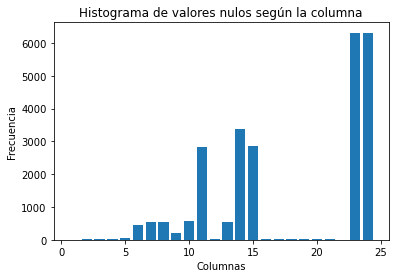

In [81]:
#hacer histograma con columnas y numero de nulos
from matplotlib import pyplot as plt
ejex=[i for i in range(1,25)]
histogram_na = plt.bar(x=ejex, height=diccna.values())
plt.title('Histograma de valores nulos según la columna')
plt.xlabel('Columnas')
plt.ylabel('Frecuencia')
plt.show();


In [15]:
#Borrar las filas con mas de 5 valores nulos

In [31]:
data.shape, data_ori.shape

((6312, 24), (25723, 24))

In [53]:
a=data.isnull().sum(axis=1)

In [57]:
data_a=pd.DataFrame(a)

In [58]:
data_a

,0
0,2
1,3
2,3
3,4
4,4
...,...
6307,22
6308,22
6309,23
8702,24


In [66]:
bad_indices=data_a[data_a[0]>5].index
len(bad_indices)

978

In [82]:
data.drop(bad_indices, axis=0, inplace=True)  #ya hemos eliminado las filas con más de 5 valores nulos. 

In [84]:
data.shape, data_ori.shape

((5334, 24), (25723, 24))

# Unificar columnas una por una.

## Columna Case Number

In [19]:
#case number parece "igual" a date, case number 1 y case number 2
#Vamos a cambiar los nulos por "unknown y luego completar las columnas con la info"

In [90]:
#data['Case Number']=data['Case Number.1']=data['Case Number.2'] #son similares, vamos a igualarlos.
data

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6290,ND.0012,Before 19-Jul-1913,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Wading,a young Scotsman,M,...,NaN,"Rural New Yorker, 7/19/1913",ND-0012-Durban-Scotsman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0012,ND.0012,13.0,NaN,NaN
6296,ND.0006,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,...,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz...",ND-0006-ArabBoy-Prymount.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0006,ND.0006,7.0,NaN,NaN
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN


In [98]:
data['CaseNumber'].isnull().sum(axis=1)

ValueError: No axis named 1 for object type Series

## Columna Type

In [ ]:
data['Type'].unique()

In [ ]:
data['Type'].replace(['Invalid','Questionable','Boat','Boatomg'],
                    ['Unknown','Unknown','Boating','Boating'],
                    inplace = True)



In [ ]:
data['Type'].value_counts()

In [ ]:
data_ori['Type'].value_counts()

# Columna Species

In [ ]:
data['Species'].unique()


In [ ]:
#tenemos: white shark, tiger shark, blue pointer, 
#cambiar ... nan said por 'unknown'

In [ ]:
data['Species'].value_counts()